# Step 1: Converting PDFs to TXT

In [1]:
import os
def pdf_to_text(name):
    txt_name = name.replace(".pdf",".txt")
    os.system("pdftotext '%s' '%s'" % (name, txt_name))   

In [2]:
!pip install xpdf

  ERROR: Could not find a version that satisfies the requirement xpdf (from versions: none)
ERROR: No matching distribution found for xpdf


In [3]:
import glob

In [4]:
pdfs = []
for filename in glob.glob('/Users/aliyaute/Desktop/Supreme_Court/SupremeCourtImmigration/*'):
    pdfs.append(filename)

In [5]:
for pdf in pdfs:
    pdf_to_text(pdf)

# Step 2: Scraping the outside data - locations

In [6]:
import requests
court_url = "https://system.uslegal.com/us-courts-of-appeals/circuits/"
raw_html = requests.get(court_url).content

In [7]:
from bs4 import BeautifulSoup

In [11]:
soup_doc = BeautifulSoup(raw_html, "html.parser")


In [12]:
[row.text.strip('\n').split('\n') for row in soup_doc.find('table').find_all('tr')[1:]]


[['District of Columbia', 'District of Columbia'],
 ['First Circuit',
  'Maine, Massachusetts, New Hampshire, Puerto Rico, Rhode Island'],
 ['Second Circuit', 'Connecticut, New York, Vermont'],
 ['Third Circuit', 'Delaware, New Jersey, Pennsylvania, Virgin Islands'],
 ['Fourth Circuit',
  'Maryland, North Carolina, South Carolina, Virginia, West Virginia'],
 ['Fifth Circuit',
  'District of the Canal Zone, Louisiana, Mississippi, Texas'],
 ['Sixth Circuit', 'Kentucky, Michigan, Ohio, Tennessee'],
 ['Seventh Circuit', 'Illinois, Indiana, Wisconsin'],
 ['Eighth Circuit',
  'Arkansas, Iowa, Minnesota, Missouri, Nebraska, North Dakota, South Dakota'],
 ['Ninth Circuit',
  'Alaska, Arizona, California, Idaho, Montana, \xa0Nevada, Oregon, Washington, Guam, Hawaii'],
 ['Tenth Circuit', 'Colorado, Kansas, New Mexico, Oklahoma, Utah, Wyoming.'],
 ['Eleventh Circuit', 'Alabama, Florida, Georgia.'],
 ['Federal Circuit', 'All Federal Judicial Districts.']]

# Step 3: Extracting Information from TXT files with RegEx

In [90]:
import re
import pandas as pd
import matplotlib



In [15]:
texts = []
for file in glob.glob('/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/*'):
    chars = len(file)
    if file[chars-4:chars] == ('.txt'):
        texts.append(file)

In [16]:
texts

['/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/07-499.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/08-495.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/08-651.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/08-681.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/09-115.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/09-60.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/10-1211.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/10-1542.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/10-577.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/10-694.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/11-182.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/11-702.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/11-820.txt',
 '/Users/aliyaute/Desktop/Supreme_Court/Immigration_Texts/12-930.txt',
 '/Us

In [17]:
all_cases = []
errors = []

for text in texts:
    
    Immigration_cases = {}
    
    f = open(text, encoding = "ISO-8859-1")
    sample_transcript = f.read()
    
    try:
    
        regex_Case = r".*([A-Z]+ v\. [A-Z]).*"
        Case_name = re.search(regex_Case, sample_transcript)
        Immigration_cases["Case"] = Case_name.group(0)

        regex_Justice = r"JUSTICE (.*) delivered the opinion of the Court"
        Justice = re.search(regex_Justice, sample_transcript)
        Immigration_cases["OJustice"] = Justice.group(1)
        
        regex_Date = r"\[([A-Z][a-z]*\s\d*,\s\d*)\]"
        Date_delivered = re.search(regex_Date, sample_transcript)
        Immigration_cases["Date"] = Date_delivered.group(1)

        regex_Circuit = r"(CERTIORARI TO THE UNITED STATES COURT OF APPEALS FOR THE)(.* CIRCUIT)"
        Circuit = re.search(regex_Circuit, sample_transcript)
        Immigration_cases["CircuitCourt"] = Circuit.group(2)
    
        regex_Docket = r"No. (.*) Argued"
        Docket = re.search(regex_Docket, sample_transcript)
        Docket_N = Docket.group(0)
        Docket_N = Docket_N.replace("\xad","-")
        Docket_N = re.findall(r"\D+([-\d]+)\D+", Docket_N)
        Immigration_cases["Docket_number"] = Docket_N
        
        alien = re.findall(r"\balien", sample_transcript)
        Immigration_cases["Alien"] = len(alien)
        
        noncitizen = re.findall(r"\bnoncitizen", sample_transcript)
        Immigration_cases["Noncitizen"] = len(noncitizen)
        
        
        person = re.findall(r"\bperson", sample_transcript)
        Immigration_cases["Person"] = len(person)
        
        human = re.findall(r"\bhuman", sample_transcript)
        Immigration_cases["Human"] = len(human)
        
        individual = re.findall(r"\bindividual", sample_transcript)
        Immigration_cases["Individual"] = len(individual)
    
        all_cases.append(Immigration_cases)
        
    except:
        errors.append(text)

In [250]:
all_cases

[{'Case': 'NEGUSIE v. HOLDER, ATTORNEY GENERAL',
  'OJustice': 'KENNEDY',
  'Date': 'March 3, 2009',
  'CircuitCourt': ' FIFTH CIRCUIT',
  'Docket_number': ['07-499'],
  'Alien': 22,
  'Noncitizen': 0,
  'Person': 8,
  'Human': 1,
  'Individual': 4},
 {'Case': 'NIJHAWAN v. HOLDER, ATTORNEY GENERAL',
  'OJustice': 'BREYER',
  'Date': 'June 15, 2009',
  'CircuitCourt': ' THIRD CIRCUIT',
  'Docket_number': ['08-495'],
  'Alien': 12,
  'Noncitizen': 0,
  'Person': 0,
  'Human': 0,
  'Individual': 0},
 {'Case': 'PADILLA v. KENTUCKY',
  'OJustice': 'STEVENS',
  'Date': 'March 31, 2010',
  'CircuitCourt': ' SIXTH CIRCUIT',
  'Docket_number': ['08-651'],
  'Alien': 8,
  'Noncitizen': 22,
  'Person': 2,
  'Human': 0,
  'Individual': 3},
 {'Case': 'NKEN v. HOLDER, ATTORNEY GENERAL',
  'OJustice': 'ROBERTS',
  'Date': 'April 22, 2009',
  'CircuitCourt': ' FOURTH CIRCUIT',
  'Docket_number': ['08-681'],
  'Alien': 48,
  'Noncitizen': 0,
  'Person': 2,
  'Human': 0,
  'Individual': 5},
 {'Case': 'A

In [84]:
pd.DataFrame(all_cases, columns=['Case','Date','OJustice','Alien','Noncitizen','Person','Individual','Human'])
Table_1 = pd.DataFrame(all_cases, columns=['Case','Date','OJustice','Alien','Noncitizen','Person','Individual','Human'])
Table_1




,Case,Date,OJustice,Alien,Noncitizen,Person,Individual,Human
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL","March 3, 2009",KENNEDY,22,0,8,4,1
1,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL","June 15, 2009",BREYER,12,0,0,0,0
2,PADILLA v. KENTUCKY,"March 31, 2010",STEVENS,8,22,2,3,0
3,"NKEN v. HOLDER, ATTORNEY GENERAL","April 22, 2009",ROBERTS,48,0,2,5,0
4,AMERICA v. WHITING,"May 26, 2011",ROBERTS,71,0,10,12,0
5,"CARACHURI-ROSENDO v. HOLDER, ATTORNEY","June 14, 2010",STEVENS,2,11,5,0,0
6,"VARTELAS v. HOLDER, ATTORNEY GENERAL","March 28, 2012",GINSBURG,42,1,4,2,0
7,"HOLDER, ATTORNEY GENERAL v. MARTINEZ","May 21, 2012",KAGAN,47,0,4,1,0
8,KAWASHIMA v. HOLDER,"February 21, 2012",THOMAS,10,0,5,0,0
9,"JUDULANG v. HOLDER, ATTORNEY GENERAL","December 12, 2011",KAGAN,127,0,2,4,0


In [91]:
Table_1.sort_values(by='Alien', ascending=False)

,Case,Date,OJustice,Alien,Noncitizen,Person,Individual,Human
17,JENNINGS v. RODRIGUEZ,"February 27, 2018",ALITO,195,0,8,4,3
19,NIELSEN v. PREAP,"March 19, 2019",ALITO,163,0,9,3,0
9,"JUDULANG v. HOLDER, ATTORNEY GENERAL","December 12, 2011",KAGAN,127,0,2,4,0
13,SCIALABBA v. CUELLAR DE OSORIO,"June 9, 2014",KAGAN,115,0,7,4,0
10,ARIZONA v. UNITED STATES,"June 25, 2012",KENNEDY,106,1,26,5,1
4,AMERICA v. WHITING,"May 26, 2011",ROBERTS,71,0,10,12,0
23,TRUMP v. HAWAII,"June 26, 2018",ROBERTS,53,0,13,20,2
3,"NKEN v. HOLDER, ATTORNEY GENERAL","April 22, 2009",ROBERTS,48,0,2,5,0
7,"HOLDER, ATTORNEY GENERAL v. MARTINEZ","May 21, 2012",KAGAN,47,0,4,1,0
6,"VARTELAS v. HOLDER, ATTORNEY GENERAL","March 28, 2012",GINSBURG,42,1,4,2,0


In [92]:
Table_1.sort_values(by='OJustice', ascending=False)

,Case,Date,OJustice,Alien,Noncitizen,Person,Individual,Human
21,"ESQUIVEL-QUINTANA v. SESSIONS, ATTORNEY","May 30, 2017",THOMAS,7,0,18,0,0
8,KAWASHIMA v. HOLDER,"February 21, 2012",THOMAS,10,0,5,0,0
2,PADILLA v. KENTUCKY,"March 31, 2010",STEVENS,8,22,2,3,0
5,"CARACHURI-ROSENDO v. HOLDER, ATTORNEY","June 14, 2010",STEVENS,2,11,5,0,0
11,"MONCRIEFFE v. HOLDER, ATTORNEY GENERAL","April 23, 2013",SOTOMAYOR,0,39,11,3,0
22,"PEREIRA v. SESSIONS, ATTORNEY GENERAL","June 21, 2018",SOTOMAYOR,20,55,2,0,0
14,KERRY v. DIN,"June 15, 2015",SCALIA,11,0,13,5,0
23,TRUMP v. HAWAII,"June 26, 2018",ROBERTS,53,0,13,20,2
3,"NKEN v. HOLDER, ATTORNEY GENERAL","April 22, 2009",ROBERTS,48,0,2,5,0
4,AMERICA v. WHITING,"May 26, 2011",ROBERTS,71,0,10,12,0


In [93]:
type(pd.read_csv("Appointment.csv"))

pandas.core.frame.DataFrame

In [94]:
Table_2 = pd.read_csv("Appointment.csv")
Table_2

,OJustice,Appointment
0,ALITO,Republican Appointed
1,KAGAN,Democrat Appointed
2,THOMAS,Republican Appointed
3,KENNEDY,Republican Appointed
4,GINSBURG,Democrat Appointed
5,ROBERTS,Republican Appointed
6,BREYER,Democrat Appointed
7,SOTOMAYOR,Democrat Appointed
8,SCALIA,Republican Appointed
9,STEVENS,Republican Appointed


In [95]:
Final_Table = pd.merge(Table_1,Table_2, on='OJustice')
Final_Table.head(3)

,Case,Date,OJustice,Alien,Noncitizen,Person,Individual,Human,Appointment
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL","March 3, 2009",KENNEDY,22,0,8,4,1,Republican Appointed
1,ARIZONA v. UNITED STATES,"June 25, 2012",KENNEDY,106,1,26,5,1,Republican Appointed
2,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL","June 15, 2009",BREYER,12,0,0,0,0,Democrat Appointed


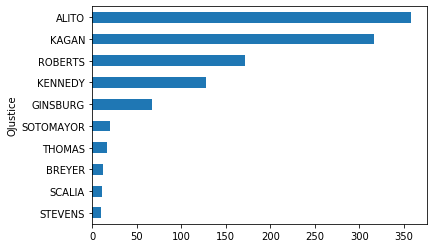

In [96]:
#not clean
Final_Table.groupby('OJustice').Alien.sum().sort_values().plot(kind='barh')

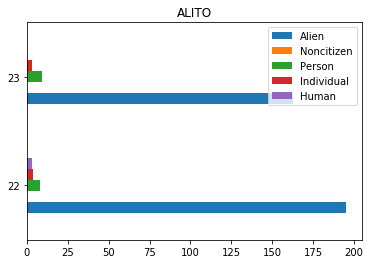

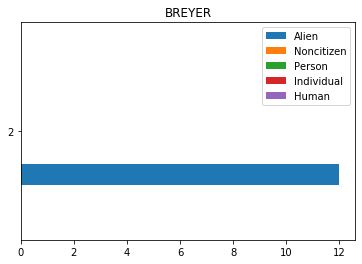

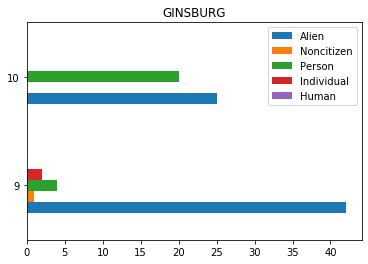

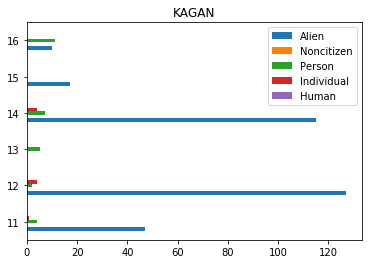

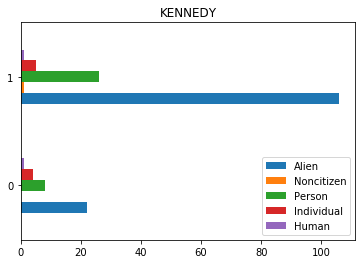

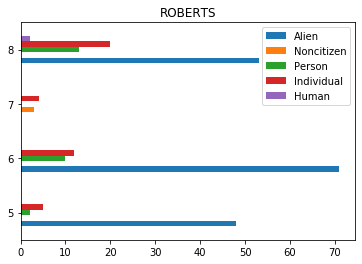

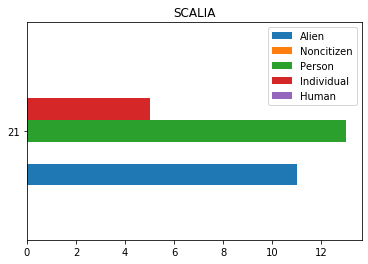

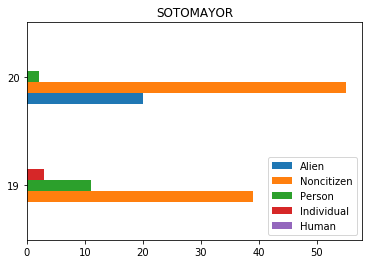

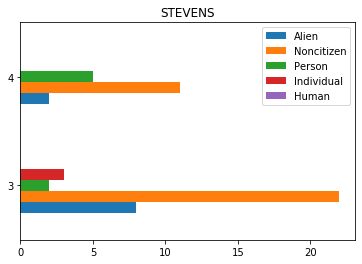

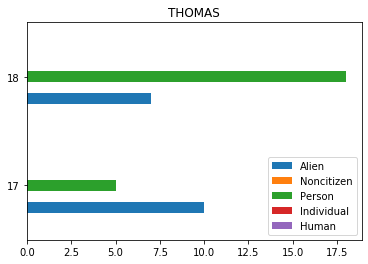

In [97]:
for title, group in Final_Table.groupby('OJustice')[['Alien', 'Noncitizen', 'Person',
       'Individual', 'Human']]:
    group.plot(kind='barh', title=title)

In [ ]:
#!pip3 install nltk

In [ ]:
#import nltk
#nltk.download()

In [98]:
from nltk.tokenize import word_tokenize

In [99]:
word_count = []

for text in texts:
    
    word_dict = {}
    
    f = open(text, encoding = "ISO-8859-1")
    sample_transcript = f.read()
    
    try:
        regex_Case = r".*([A-Z]+ v\. [A-Z]).*"
        Case_name = re.search(regex_Case, sample_transcript)
        Case_name = Case_name.group(0)
    
        words = word_tokenize(sample_transcript)
        
        count = len(words)
        
        word_dict['Case'] = Case_name
        word_dict['Total_words'] = count
        
        word_count.append(word_dict)
        
    except:
        pass
    

In [101]:
WordTable = pd.merge(Final_Table, words, on='Case')
WordTable = WordTable[['Case','OJustice','Appointment','Alien','Noncitizen','Person','Individual','Human']]
WordTable.head(3)


,Case,OJustice,Appointment,Alien,Noncitizen,Person,Individual,Human
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL",KENNEDY,Republican Appointed,22,0,8,4,1
1,ARIZONA v. UNITED STATES,KENNEDY,Republican Appointed,106,1,26,5,1
2,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL",BREYER,Democrat Appointed,12,0,0,0,0


In [102]:
WordTable.head()

,Case,OJustice,Appointment,Alien,Noncitizen,Person,Individual,Human
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL",KENNEDY,Republican Appointed,22,0,8,4,1
1,ARIZONA v. UNITED STATES,KENNEDY,Republican Appointed,106,1,26,5,1
2,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL",BREYER,Democrat Appointed,12,0,0,0,0
3,PADILLA v. KENTUCKY,STEVENS,Republican Appointed,8,22,2,3,0
4,"CARACHURI-ROSENDO v. HOLDER, ATTORNEY",STEVENS,Republican Appointed,2,11,5,0,0


In [45]:
WordTable['keywords'] = WordTable.sum(axis=1)
WordTable.head(3)

,Case,OJustice,Appointment,Alien,Noncitizen,Person,Individual,Human,keywords
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL",KENNEDY,Republican Appointed,22,0,8,4,1,70
1,ARIZONA v. UNITED STATES,KENNEDY,Republican Appointed,106,1,26,5,1,278
2,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL",BREYER,Democrat Appointed,12,0,0,0,0,24


In [46]:
WordTable['Alien_%'] = WordTable['Alien'] / WordTable['keywords']
WordTable.head(3)

,Case,OJustice,Appointment,Alien,Noncitizen,Person,Individual,Human,keywords,Alien_%
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL",KENNEDY,Republican Appointed,22,0,8,4,1,70,0.314286
1,ARIZONA v. UNITED STATES,KENNEDY,Republican Appointed,106,1,26,5,1,278,0.381295
2,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL",BREYER,Democrat Appointed,12,0,0,0,0,24,0.500000


In [47]:
WordTable['Noncitizen_%'] = WordTable['Noncitizen'] / WordTable['keywords']
WordTable.head(3)

,Case,OJustice,Appointment,Alien,Noncitizen,Person,Individual,Human,keywords,Alien_%,Noncitizen_%
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL",KENNEDY,Republican Appointed,22,0,8,4,1,70,0.314286,0.000000
1,ARIZONA v. UNITED STATES,KENNEDY,Republican Appointed,106,1,26,5,1,278,0.381295,0.003597
2,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL",BREYER,Democrat Appointed,12,0,0,0,0,24,0.500000,0.000000


In [51]:
WordTable['Person_%'] = WordTable['Person'] / WordTable['keywords']
WordTable.head(3)

,Case,OJustice,Appointment,Alien,Noncitizen,Person,Individual,Human,keywords,Alien_%,Noncitizen_%,Person_%,Individual_%,Human_%
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL",KENNEDY,Republican Appointed,22,0,8,4,1,70,0.314286,0.000000,0.114286,0.057143,0.014286
1,ARIZONA v. UNITED STATES,KENNEDY,Republican Appointed,106,1,26,5,1,278,0.381295,0.003597,0.093525,0.017986,0.003597
2,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL",BREYER,Democrat Appointed,12,0,0,0,0,24,0.500000,0.000000,0.000000,0.000000,0.000000


In [49]:
WordTable['Individual_%'] = WordTable['Individual'] / WordTable['keywords']
WordTable.head(3)

,Case,OJustice,Appointment,Alien,Noncitizen,Person,Individual,Human,keywords,Alien_%,Noncitizen_%,Person_%,Individual_%
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL",KENNEDY,Republican Appointed,22,0,8,4,1,70,0.314286,0.000000,0.114286,0.057143
1,ARIZONA v. UNITED STATES,KENNEDY,Republican Appointed,106,1,26,5,1,278,0.381295,0.003597,0.093525,0.017986
2,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL",BREYER,Democrat Appointed,12,0,0,0,0,24,0.500000,0.000000,0.000000,0.000000


In [50]:
WordTable['Human_%'] = WordTable['Human'] / WordTable['keywords']
WordTable.head(3)

,Case,OJustice,Appointment,Alien,Noncitizen,Person,Individual,Human,keywords,Alien_%,Noncitizen_%,Person_%,Individual_%,Human_%
0,"NEGUSIE v. HOLDER, ATTORNEY GENERAL",KENNEDY,Republican Appointed,22,0,8,4,1,70,0.314286,0.000000,0.114286,0.057143,0.014286
1,ARIZONA v. UNITED STATES,KENNEDY,Republican Appointed,106,1,26,5,1,278,0.381295,0.003597,0.093525,0.017986,0.003597
2,"NIJHAWAN v. HOLDER, ATTORNEY GENERAL",BREYER,Democrat Appointed,12,0,0,0,0,24,0.500000,0.000000,0.000000,0.000000,0.000000


In [52]:
Unique_Justice = WordTable.groupby('OJustice').sum()
Unique_Justice


,Alien,Noncitizen,Person,Individual,Human,keywords,Alien_%,Noncitizen_%,Person_%,Individual_%,Human_%
OJustice,,,,,,,,,,,
ALITO,358,0,17,7,3,770,0.930000,0.000000,0.044762,0.018095,0.007143
BREYER,12,0,0,0,0,24,0.500000,0.000000,0.000000,0.000000,0.000000
GINSBURG,67,1,24,2,0,188,0.706349,0.010204,0.263039,0.020408,0.000000
KAGAN,316,0,29,9,0,708,2.123811,0.000000,0.835663,0.040526,0.000000
KENNEDY,128,1,34,9,2,348,0.695581,0.003597,0.207811,0.075128,0.017883
ROBERTS,172,3,25,41,2,486,1.119220,0.214286,0.145809,0.509321,0.011364
SCALIA,11,0,13,5,0,58,0.189655,0.000000,0.224138,0.086207,0.000000
SOTOMAYOR,20,94,13,3,0,260,0.129870,0.725067,0.116761,0.028302,0.000000
THOMAS,17,0,23,0,0,80,0.473333,0.000000,0.526667,0.000000,0.000000


In [53]:
Unique_Justice['Alien_%'] = Unique_Justice['Alien'] / Unique_Justice['keywords']
Unique_Justice['Noncitizen_%'] = Unique_Justice['Noncitizen'] / Unique_Justice['keywords']
Unique_Justice['Person_%'] = Unique_Justice['Person'] / Unique_Justice['keywords']
Unique_Justice['Individual_%'] = Unique_Justice['Individual'] / Unique_Justice['keywords']
Unique_Justice['Human_%'] = Unique_Justice['Human'] / Unique_Justice['keywords']

In [55]:
Unique_Justice

,Alien,Noncitizen,Person,Individual,Human,keywords,Alien_%,Noncitizen_%,Person_%,Individual_%,Human_%
OJustice,,,,,,,,,,,
ALITO,358,0,17,7,3,770,0.464935,0.000000,0.022078,0.009091,0.003896
BREYER,12,0,0,0,0,24,0.500000,0.000000,0.000000,0.000000,0.000000
GINSBURG,67,1,24,2,0,188,0.356383,0.005319,0.127660,0.010638,0.000000
KAGAN,316,0,29,9,0,708,0.446328,0.000000,0.040960,0.012712,0.000000
KENNEDY,128,1,34,9,2,348,0.367816,0.002874,0.097701,0.025862,0.005747
ROBERTS,172,3,25,41,2,486,0.353909,0.006173,0.051440,0.084362,0.004115
SCALIA,11,0,13,5,0,58,0.189655,0.000000,0.224138,0.086207,0.000000
SOTOMAYOR,20,94,13,3,0,260,0.076923,0.361538,0.050000,0.011538,0.000000
THOMAS,17,0,23,0,0,80,0.212500,0.000000,0.287500,0.000000,0.000000


In [56]:
Plot_Table_By_Party = pd.merge(Unique_Justice,Table_2, on='OJustice')
Plot_Table_By_Party

,OJustice,Alien,Noncitizen,Person,Individual,Human,keywords,Alien_%,Noncitizen_%,Person_%,Individual_%,Human_%,Appointment
0,ALITO,358,0,17,7,3,770,0.464935,0.000000,0.022078,0.009091,0.003896,Republican Appointed
1,BREYER,12,0,0,0,0,24,0.500000,0.000000,0.000000,0.000000,0.000000,Democrat Appointed
2,GINSBURG,67,1,24,2,0,188,0.356383,0.005319,0.127660,0.010638,0.000000,Democrat Appointed
3,KAGAN,316,0,29,9,0,708,0.446328,0.000000,0.040960,0.012712,0.000000,Democrat Appointed
4,KENNEDY,128,1,34,9,2,348,0.367816,0.002874,0.097701,0.025862,0.005747,Republican Appointed
5,ROBERTS,172,3,25,41,2,486,0.353909,0.006173,0.051440,0.084362,0.004115,Republican Appointed
6,SCALIA,11,0,13,5,0,58,0.189655,0.000000,0.224138,0.086207,0.000000,Republican Appointed
7,SOTOMAYOR,20,94,13,3,0,260,0.076923,0.361538,0.050000,0.011538,0.000000,Democrat Appointed
8,THOMAS,17,0,23,0,0,80,0.212500,0.000000,0.287500,0.000000,0.000000,Republican Appointed


In [59]:
import matplotlib.pyplot as plt

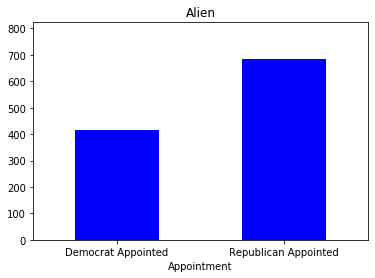

In [71]:
Plot_Table_By_Party.groupby('Appointment').Alien.sum().sort_values().plot(kind='bar', color='blue', title='Alien')
plt.xticks(rotation='horizontal')
plt.margins(0.2)
#plt.subplots_adjust(bottom=-0.2)
plt.show()


In [235]:
import matplotlib.pyplot as plt

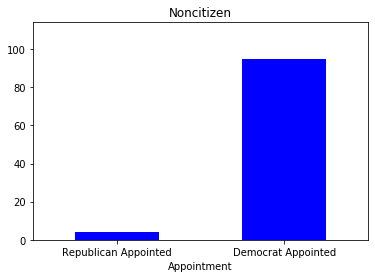

In [70]:
Plot_Table_By_Party.groupby('Appointment').Noncitizen.sum().sort_values().plot(kind='bar', title='Noncitizen', color='blue')
plt.xticks(rotation='horizontal')
plt.margins(0.2)
#plt.subplots_adjust(bottom=-0.2)
plt.show()


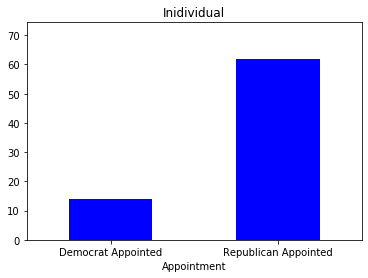

In [75]:
Plot_Table_By_Party.groupby('Appointment').Individual.sum().sort_values().plot(kind='bar', title='Inidividual', color='blue')
plt.xticks(rotation='horizontal')
plt.margins(0.2)
#plt.subplots_adjust(bottom=-0.2)
plt.show()


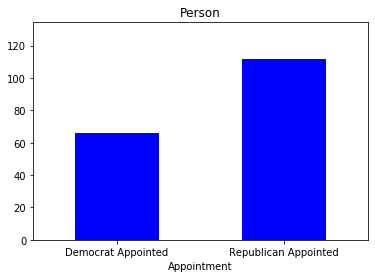

In [76]:
Plot_Table_By_Party.groupby('Appointment').Person.sum().sort_values().plot(kind='bar', title='Person', color='blue')
plt.xticks(rotation='horizontal')
plt.margins(0.2)

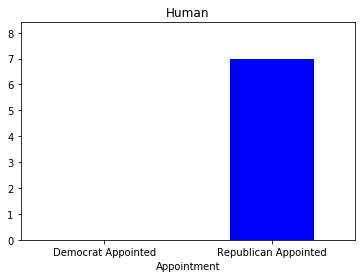

In [77]:
Plot_Table_By_Party.groupby('Appointment').Human.sum().sort_values().plot(kind='bar', title='Human', color='blue')
plt.xticks(rotation='horizontal')
plt.margins(0.2)